# Bank-Marketing-Prediction

In [129]:
# import all necessary libraries
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Get the data

In [130]:
# load the data with a delimiter = ;
df = pd.read_csv('dataset/bank-full.csv', delimiter=';')

In [131]:
# get a headup of the data
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [132]:
df.shape

(45211, 17)

In [133]:
# get a description of our features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [134]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Explore and visualize the data 

In [135]:
# create an additional dataframe that holds features upon exploration
df_features = pd.DataFrame()

In [136]:
# check the datatypes of our features
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [137]:
# describe our numerical data
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [138]:
# describe our categorical data
df.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [139]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**Target variable: y**

In [140]:
# used to convert columns with values (no, yes) into numerical values of (0, 1)
def yes_no_encoder(data):
    if 'no' in data:
        data = 0
    elif 'yes' in data:
        data = 1
    
    return data

In [141]:
# convert our categorical target to numeric
df['y'] = df['y'].apply(yes_no_encoder)

0    39922
1     5289
Name: y, dtype: int64


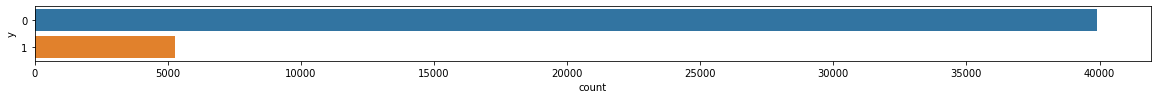

In [142]:
fig = plt.figure(figsize=(20, 1))
sns.countplot(y='y', data=df)
print(df.y.value_counts())

**Feature: Age**

In [143]:
df_features['age'] = df['age']

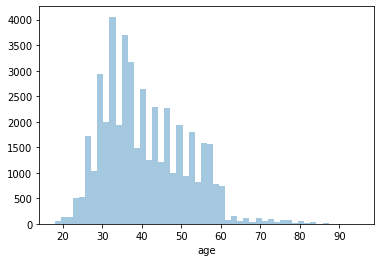

In [144]:
sns.distplot(df_features['age'], kde=False)

**Feature: Job**

In [145]:
df_features['job'] = df['job']

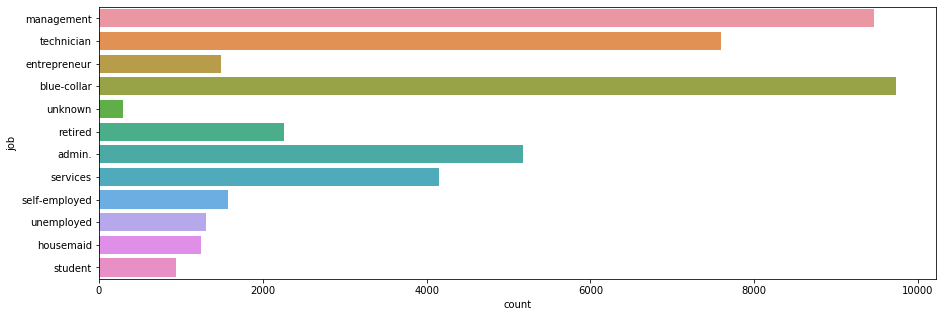

In [146]:
plt.figure(figsize=(15, 5))
sns.countplot(y='job', data=df_features)

**Feature: marital**

In [147]:
df_features['marital'] = df['marital']

In [148]:
# returns percentage distribution of all categorical items in a specified column
def value_perc(feature):
    perc = feature.value_counts(normalize=True).reset_index()
    perc.columns = ['value', 'perc']
    perc['perc'] = round( perc['perc'] * 100 , 2)
    return perc

      value   perc
0   married  60.19
1    single  28.29
2  divorced  11.52


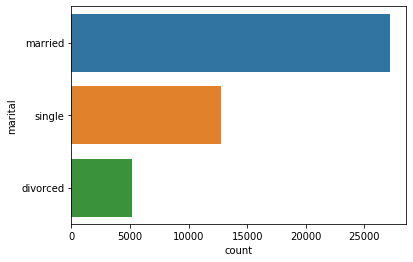

In [149]:
sns.countplot(y='marital', data=df_features)
print(value_perc(df_features.marital))

**Feature: default**

In [150]:
df_features['default'] = df['default']

In [151]:
# conver categorical default values to numeric values
df_features['default'] = df_features['default'].apply(yes_no_encoder)

  value  perc
0    no  98.2
1   yes   1.8


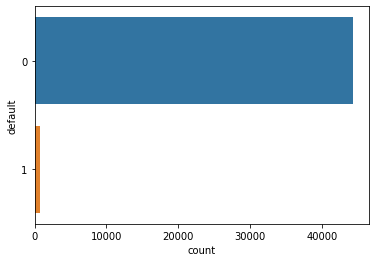

In [152]:
sns.countplot(y='default', data=df_features)
print(value_perc(df['default']))

**Feature: Balance**

In [153]:
df_features['balance'] = df['balance']

The mean balance:  1362.27
The mean balance:  3044.77


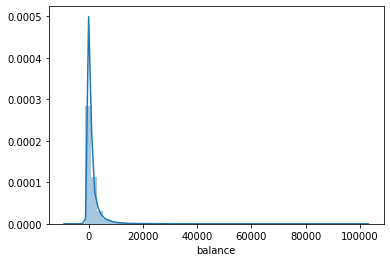

In [154]:
sns.distplot(df_features['balance'])
print("The mean balance: ", round(df_features['balance'].mean(), 2))
print("The mean balance: ", round(df_features['balance'].std(), 2))

In [155]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


**Feature: Housing**

In [156]:
df_features['housing'] = df['housing']

In [157]:
df_features['housing'] = df_features['housing'].apply(yes_no_encoder) # convert yes/no to numeric equivalent

  value   perc
0   yes  55.58
1    no  44.42


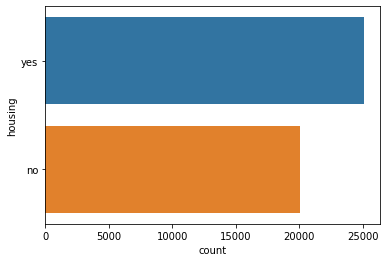

In [158]:
sns.countplot(y='housing', data=df)
print(value_perc(df['housing']))

**Feature: Loan**

In [159]:
df_features['loan'] = df['loan']

In [160]:
df_features['loan'] = df_features['loan'].apply(yes_no_encoder)

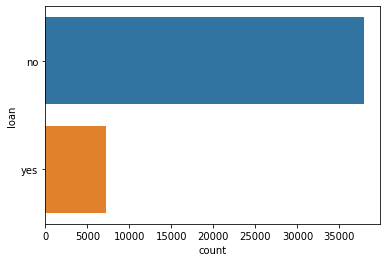

In [161]:
sns.countplot(y='loan', data=df)

**Feature: Contract**

In [162]:
df_features['contact'] = df['contact']

In [164]:
df_features['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

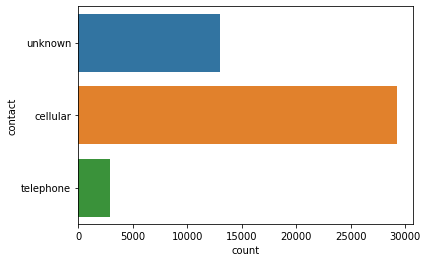

In [165]:
sns.countplot(y='contact', data=df_features)

**Feature: Day**

In [166]:
df_features['day'] = df['day']

Mean number of day:  15.80641879188693
Mean number of day:  8.322476153044592


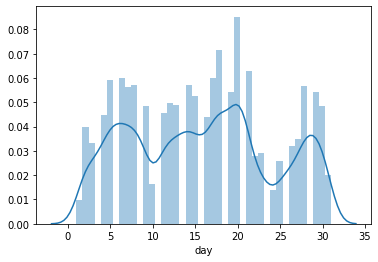

In [171]:
sns.distplot(df_features['day'])
print("Mean number of day: ", df_features['day'].mean())
print("Mean number of day: ", df_features['day'].std())